In [1]:
#import all the necessary libraries
import gym
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean 

In [2]:
#load the taxi game environment
env = gym.make("Taxi-v2")

In [3]:
#visualize the current state of environment
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
#define a function to create a dictionary where rows represent states and columns represent 
#actions. Initialize this dictionary to zeros initially. This dictionary represents the 
##Q matrix
def initialize_Q():
    #env.observation_space.n returns the number of states in the environment
    #env.action_space.n returns the number of actions in the environment
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    return Q

In [5]:
#create a function for the Q-Learning algorithm
def q_learning(alpha,gamma,epsilon,decay_rate,num_episodes):
    #Create a python dictionary which acts as Q-matrix
    Q=initialize_Q();
    #create lists to save the performance values for each episode
    total_rewards=[]
    total_steps=[]
    for i in range(1,num_episodes+1):
        #start every episode with a random state
        state=env.reset()
        #initialize done to false
        done=False
        #variables to save the performance value for one episode
        rewards_counter,steps_counter=0,0
        #repeat until the goal is not reached
        while not done:
            #compare the epislon value with a randomly generated value between 0 and 1.
            #if the value of episilon is greater than the generated value, perform exploration
            #or else, perform exploitation
            if np.random.uniform(0,1) < epsilon:
                action = env.action_space.sample()  #choose the action randomly (exploration)
            else:
                action = np.argmax(Q[state]) #choose the best value action from the Q matrix
                                             #(exploitation)
                
            #perform the selected action in the environment using the step() function.
            #It returns the next state, reward received because of taking the action in the 
            #environment, whether the goal has reached or not and some more information in a 
            #dictionary format for debugging
            newstate,reward,done,info = env.step(action)
            
            #Update the Q matrix (python dictionary) according to the following formula
            #Q[state,action] = Q[state,action] + alpha*(reward + gamma*Q[newstate,np.argmax(Q[newstate])] - Q[state,action])
            #get the existing value from the Q matrix (python dictionary)
            old_value = Q[state, action]
            #get the maximum value for future estimates
            next_max = np.max(Q[newstate])
            #calculate using Bellman equation
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            #update the Q matrix (python dictionary)
            Q[state, action] = new_value
            #calculate the total rewards in one episode
            rewards_counter+=reward
            #calculate the total steps in one episode
            steps_counter+=1
            #update the next state as the current state
            state=newstate
        
        #reduce the value of epsilon after every episode
        epsilon=epsilon*decay_rate;
        
        #append the performance values of one episode to a list
        total_rewards.append(rewards_counter)
        total_steps.append(steps_counter)
    return total_rewards,total_steps


In [6]:
#function for smoothning the results by taking an average of 20 episodes
def plotting(total_measure,num_episodes):
    per_20_episodes = np.split(np.array(total_measure),num_episodes/20)
    avg_measure=[]
    avg_epi=[]
    count=20
    for r in per_20_episodes:
        avg_measure.append(sum(r/20))
        avg_epi.append(count)
        count += 20
    return avg_measure,avg_epi    

In [7]:
#set the number of episodes to 5000
num_episodes=5000

In [8]:
#perform Q-Learning with default parameters
total_rewards,total_steps=q_learning(0.8,0.9,1.0,0.99,5000)

In [9]:
#get the average results per 20 episodes
avg_rewards,avg_epi=plotting(total_rewards,5000)
avg_steps,avg_epi=plotting(total_steps,5000)

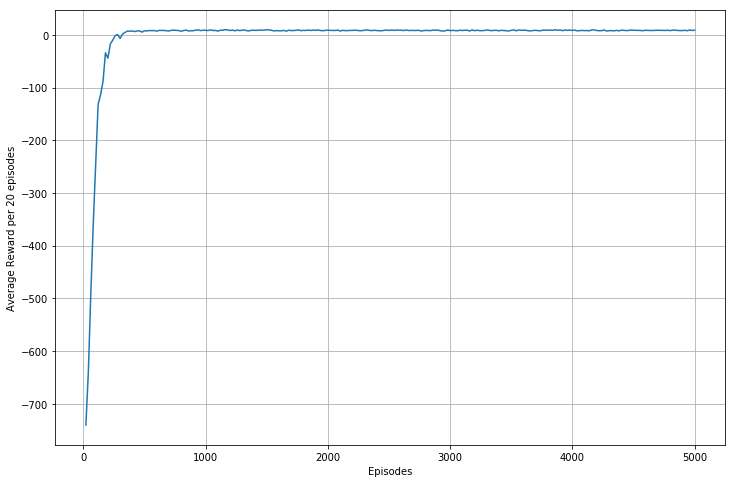

In [10]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(avg_epi,avg_rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward per 20 episodes')
plt.grid()
plt.savefig('Rewards.png')

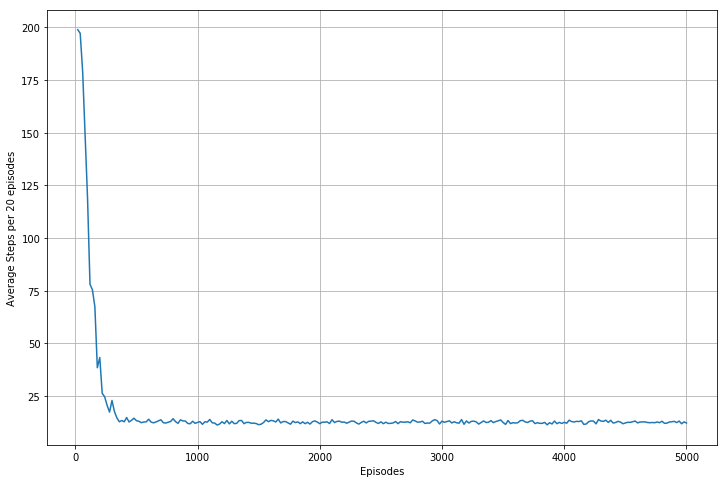

In [11]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(avg_epi,avg_steps)
plt.xlabel('Episodes')
plt.ylabel('Average Steps per 20 episodes')
plt.grid()
plt.savefig('Steps.png')

In [12]:
#to further understand the performance, calculate the mean results from the last 1000 episodes
mean_reward=mean(total_rewards[-1000:])
mean_step=mean(total_steps[-1000:])
print('Mean Reward = ',mean_reward)
print('Mean Step = ',mean_step)

Mean Reward =  8.294
Mean Step =  12.706


# Alpha Values

In [13]:
#perform Q-learning for various values of alpha (learning rate)
total_rewards2,total_steps2=q_learning(0.001,0.9,1.0,0.99,num_episodes)
total_rewards3,total_steps3=q_learning(0.01,0.9,1.0,0.99,num_episodes)
total_rewards4,total_steps4=q_learning(0.1,0.9,1.0,0.99,num_episodes)
total_rewards5,total_steps5=q_learning(0.3,0.9,1.0,0.99,num_episodes)
total_rewards6,total_steps6=q_learning(0.8,0.9,1.0,0.99,num_episodes)

In [14]:
#calculate the average rewards per 20 episodes for each model 
avg_rewards2,avg_epi2=plotting(total_rewards2,num_episodes)
avg_rewards3,avg_epi3=plotting(total_rewards3,num_episodes)
avg_rewards4,avg_epi4=plotting(total_rewards4,num_episodes)
avg_rewards5,avg_epi5=plotting(total_rewards5,num_episodes)
avg_rewards6,avg_epi6=plotting(total_rewards6,num_episodes)

In [15]:
#calculate the average steps per 20 episodes for each model 
avg_steps2,avg_epi2=plotting(total_steps2,num_episodes)
avg_steps3,avg_epi3=plotting(total_steps3,num_episodes)
avg_steps4,avg_epi4=plotting(total_steps4,num_episodes)
avg_steps5,avg_epi5=plotting(total_steps5,num_episodes)
avg_steps6,avg_epi6=plotting(total_steps6,num_episodes)

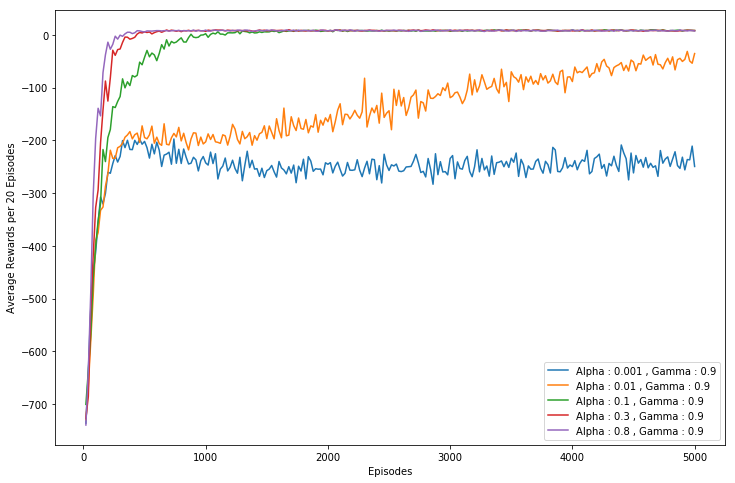

In [16]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(avg_epi2,avg_rewards2, label='Alpha : 0.001 , Gamma : 0.9')
plt.plot(avg_epi3,avg_rewards3, label='Alpha : 0.01 , Gamma : 0.9')
plt.plot(avg_epi4,avg_rewards4, label='Alpha : 0.1 , Gamma : 0.9')
plt.plot(avg_epi5,avg_rewards5, label='Alpha : 0.3 , Gamma : 0.9')
plt.plot(avg_epi6,avg_rewards6, label='Alpha : 0.8 , Gamma : 0.9')
plt.xlabel('Episodes')
plt.ylabel('Average Rewards per 20 Episodes')
plt.legend()
plt.savefig('AplhaRewards.png')

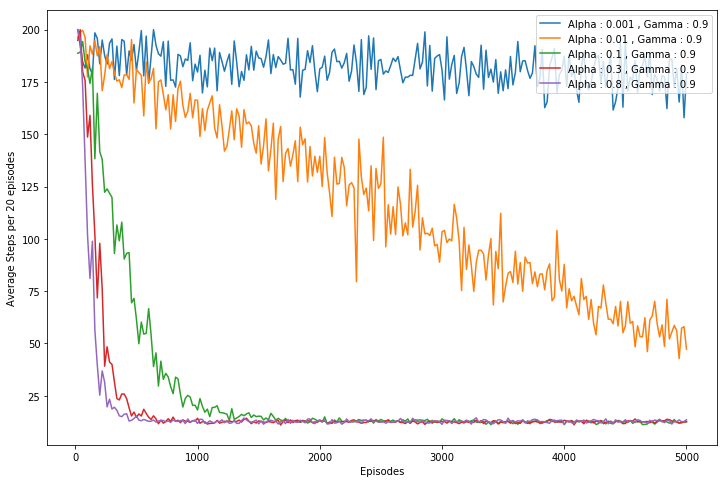

In [17]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(avg_epi2,avg_steps2, label='Alpha : 0.001 , Gamma : 0.9')
plt.plot(avg_epi3,avg_steps3, label='Alpha : 0.01 , Gamma : 0.9')
plt.plot(avg_epi4,avg_steps4, label='Alpha : 0.1 , Gamma : 0.9')
plt.plot(avg_epi5,avg_steps5, label='Alpha : 0.3 , Gamma : 0.9')
plt.plot(avg_epi6,avg_steps6, label='Alpha : 0.8 , Gamma : 0.9')
plt.xlabel('Episodes')
plt.ylabel('Average Steps per 20 episodes')
plt.legend(loc='upper right')
plt.savefig('AlphaSteps.png')

In [18]:
#to further understand the performance, calculate the mean rewards from the last 1000 episodes
mean_reward2=(mean(total_rewards2[-1000:]))
mean_reward3=(mean(total_rewards3[-1000:]))
mean_reward4=(mean(total_rewards4[-1000:]))
mean_reward5=(mean(total_rewards5[-1000:]))
mean_reward6=mean(total_rewards6[-1000:])
print('Alpha =0.001 : Mean_Reward = ',mean_reward2)
print('Alpha =0.01 : Mean_Reward = ',mean_reward3)
print('Alpha =0.1 : Mean_Reward = ',mean_reward4)
print('Alpha =0.3 : Mean_Reward = ',mean_reward5)
print('Alpha =0.8 : Mean_Reward = ',mean_reward6)

Alpha =0.001 : Mean_Reward =  -241.667
Alpha =0.01 : Mean_Reward =  -56.089
Alpha =0.1 : Mean_Reward =  8.579
Alpha =0.3 : Mean_Reward =  8.37
Alpha =0.8 : Mean_Reward =  8.238


In [19]:
#to further understand the performance, calculate the mean steps from the last 1000 episodes
mean_steps2=(mean(total_steps2[-1000:]))
mean_steps3=(mean(total_steps3[-1000:]))
mean_steps4=(mean(total_steps4[-1000:]))
mean_steps5=(mean(total_steps5[-1000:]))
mean_steps6=mean(total_steps6[-1000:])
print('Alpha =0.001 : Mean_steps = ',mean_steps2)
print('Alpha =0.01 : Mean_steps = ',mean_steps3)
print('Alpha =0.1 : Mean_steps = ',mean_steps4)
print('Alpha =0.3 : Mean_steps = ',mean_steps5)
print('Alpha =0.8 : Mean_steps = ',mean_steps6)

Alpha =0.001 : Mean_steps =  177.5
Alpha =0.01 : Mean_steps =  61.759
Alpha =0.1 : Mean_steps =  12.421
Alpha =0.3 : Mean_steps =  12.63
Alpha =0.8 : Mean_steps =  12.762


# Gamma Value Change

In [20]:
#perform Q-learning for various values of gamma (discount rate)
total_rewards7,total_steps7=q_learning(0.1,0.001,1.0,0.99,num_episodes)
total_rewards8,total_steps8=q_learning(0.1,0.01,1.0,0.99,num_episodes)
total_rewards9,total_steps9=q_learning(0.1,0.1,1.0,0.99,num_episodes)
total_rewards10,total_steps10=q_learning(0.1,0.3,1.0,0.99,num_episodes)
total_rewards11,total_steps11=q_learning(0.1,0.9,1.0,0.99,num_episodes)

In [21]:
#calculate the average rewards per 20 episodes for each model 
avg_rewards7,avg_epi7=plotting(total_rewards7,num_episodes)
avg_rewards8,avg_epi8=plotting(total_rewards8,num_episodes)
avg_rewards9,avg_epi9=plotting(total_rewards9,num_episodes)
avg_rewards10,avg_epi10=plotting(total_rewards10,num_episodes)
avg_rewards11,avg_epi11=plotting(total_rewards11,num_episodes)

In [22]:
#calculate the average steps per 20 episodes for each model 
avg_steps7,avg_epi7=plotting(total_steps7,num_episodes)
avg_steps8,avg_epi8=plotting(total_steps8,num_episodes)
avg_steps9,avg_epi9=plotting(total_steps9,num_episodes)
avg_steps10,avg_epi10=plotting(total_steps10,num_episodes)
avg_steps11,avg_epi11=plotting(total_steps11,num_episodes)

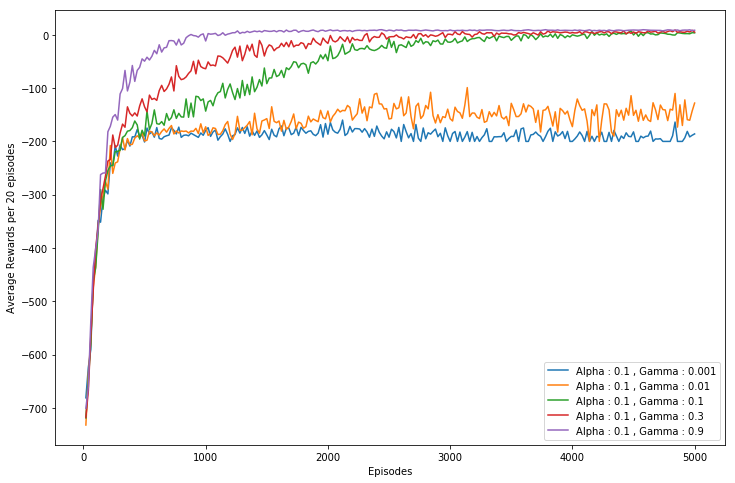

In [23]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(avg_epi7,avg_rewards7, label='Alpha : 0.1 , Gamma : 0.001')
plt.plot(avg_epi8,avg_rewards8, label='Alpha : 0.1 , Gamma : 0.01')
plt.plot(avg_epi9,avg_rewards9, label='Alpha : 0.1 , Gamma : 0.1')
plt.plot(avg_epi10,avg_rewards10, label='Alpha : 0.1 , Gamma : 0.3')
plt.plot(avg_epi11,avg_rewards11, label='Alpha : 0.1 , Gamma : 0.9')
plt.xlabel('Episodes')
plt.ylabel('Average Rewards per 20 episodes')
plt.legend()
plt.savefig('GammaRewards.png')

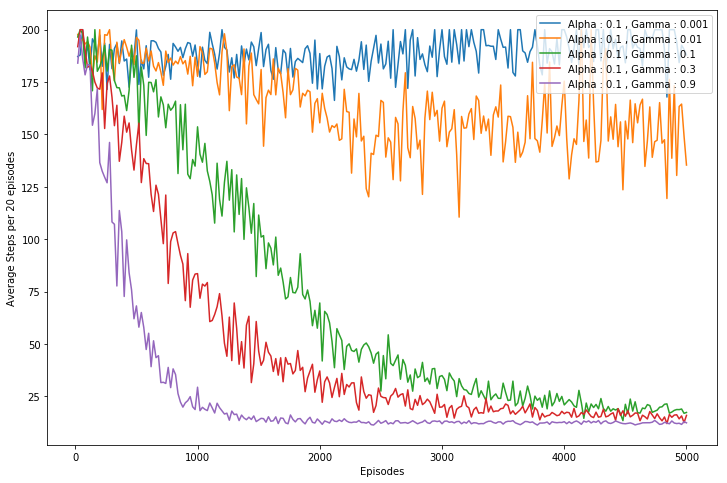

In [24]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(avg_epi7,avg_steps7, label='Alpha : 0.1 , Gamma : 0.001')
plt.plot(avg_epi8,avg_steps8, label='Alpha : 0.1 , Gamma : 0.01')
plt.plot(avg_epi9,avg_steps9, label='Alpha : 0.1 , Gamma : 0.1')
plt.plot(avg_epi10,avg_steps10, label='Alpha : 0.1 , Gamma : 0.3')
plt.plot(avg_epi11,avg_steps11, label='Alpha : 0.1 , Gamma : 0.9')
plt.xlabel('Episodes')
plt.ylabel('Average Steps per 20 episodes')
plt.legend(loc='upper right')
plt.savefig('GammaSteps.png')

In [25]:
#to further understand the performance, calculate the mean rewards from the last 1000 episodes
mean_reward7=(mean(total_rewards7[-1000:]))
mean_reward8=(mean(total_rewards8[-1000:]))
mean_reward9=(mean(total_rewards9[-1000:]))
mean_reward10=(mean(total_rewards10[-1000:]))
mean_reward11=mean(total_rewards11[-1000:])
print('Gamma =0.001 : Mean_Reward = ',mean_reward7)
print('Gamma =0.01 : Mean_Reward = ',mean_reward8)
print('Gamma =0.1 : Mean_Reward = ',mean_reward9)
print('Gamma =0.3 : Mean_Reward = ',mean_reward10)
print('Gamma =0.9 : Mean_Reward = ',mean_reward11)

Gamma =0.001 : Mean_Reward =  -192.02
Gamma =0.01 : Mean_Reward =  -147.971
Gamma =0.1 : Mean_Reward =  1.464
Gamma =0.3 : Mean_Reward =  5.024
Gamma =0.9 : Mean_Reward =  8.528


In [26]:
#to further understand the performance, calculate the mean steps from the last 1000 episodes
mean_steps7=(mean(total_steps7[-1000:]))
mean_steps8=(mean(total_steps8[-1000:]))
mean_steps9=(mean(total_steps9[-1000:]))
mean_steps10=(mean(total_steps10[-1000:]))
mean_steps11=mean(total_steps11[-1000:])
print('Gamma =0.001 : Mean_steps = ',mean_steps7)
print('Gamma =0.01 : Mean_steps = ',mean_steps8)
print('Gamma =0.1 : Mean_steps = ',mean_steps9)
print('Gamma =0.3 : Mean_steps = ',mean_steps10)
print('Gamma =0.9 : Mean_steps = ',mean_steps11)

Gamma =0.001 : Mean_steps =  193.04
Gamma =0.01 : Mean_steps =  153.515
Gamma =0.1 : Mean_steps =  19.536
Gamma =0.3 : Mean_steps =  15.976
Gamma =0.9 : Mean_steps =  12.472


## Decay Factor Change

In [27]:
#perform Q-learning for various values of decay factor
total_rewards12,total_steps12=q_learning(0.1,0.9,1.0,0.9999,num_episodes)
total_rewards13,total_steps13=q_learning(0.1,0.9,1.0,0.999,num_episodes)
total_rewards14,total_steps14=q_learning(0.1,0.9,1.0,0.99,num_episodes)
total_rewards15,total_steps15=q_learning(0.1,0.9,1.0,0.9,num_episodes)
total_rewards16,total_steps16=q_learning(0.1,0.9,1.0,0.5,num_episodes)

In [28]:
#calculate the average rewards per 20 episodes for each model 
avg_rewards12,avg_epi12=plotting(total_rewards12,num_episodes)
avg_rewards13,avg_epi13=plotting(total_rewards13,num_episodes)
avg_rewards14,avg_epi14=plotting(total_rewards14,num_episodes)
avg_rewards15,avg_epi15=plotting(total_rewards15,num_episodes)
avg_rewards16,avg_epi16=plotting(total_rewards16,num_episodes)

In [29]:
#calculate the average steps per 20 episodes for each model 
avg_steps12,avg_epi12=plotting(total_steps12,num_episodes)
avg_steps13,avg_epi13=plotting(total_steps13,num_episodes)
avg_steps14,avg_epi14=plotting(total_steps14,num_episodes)
avg_steps15,avg_epi15=plotting(total_steps15,num_episodes)
avg_steps16,avg_epi16=plotting(total_steps16,num_episodes)

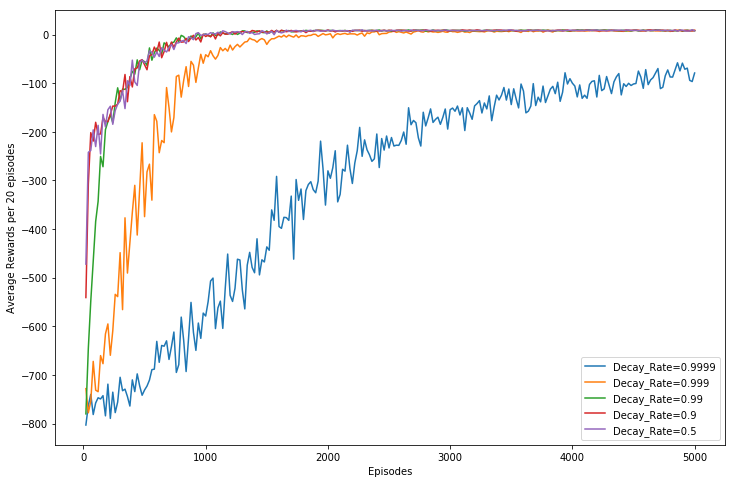

In [30]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(avg_epi12,avg_rewards12, label='Decay_Rate=0.9999')
plt.plot(avg_epi13,avg_rewards13, label='Decay_Rate=0.999')
plt.plot(avg_epi14,avg_rewards14, label='Decay_Rate=0.99')
plt.plot(avg_epi15,avg_rewards15, label='Decay_Rate=0.9')
plt.plot(avg_epi16,avg_rewards16, label='Decay_Rate=0.5')
plt.xlabel('Episodes')
plt.ylabel('Average Rewards per 20 episodes')
plt.legend()
plt.savefig('DRRewards.png')

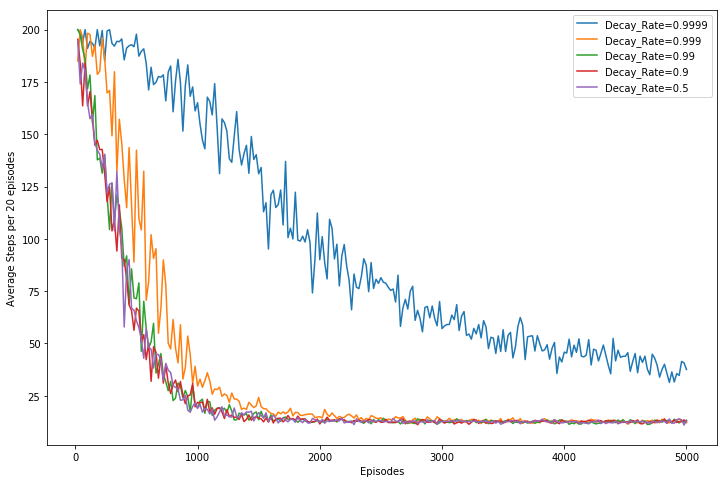

In [31]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(avg_epi12,avg_steps12, label='Decay_Rate=0.9999')
plt.plot(avg_epi13,avg_steps13, label='Decay_Rate=0.999')
plt.plot(avg_epi14,avg_steps14, label='Decay_Rate=0.99')
plt.plot(avg_epi15,avg_steps15, label='Decay_Rate=0.9')
plt.plot(avg_epi16,avg_steps16, label='Decay_Rate=0.5')
plt.xlabel('Episodes')
plt.ylabel('Average Steps per 20 episodes')
plt.legend()
plt.savefig('DRSteps.png')

In [32]:
#to further understand the performance, calculate the mean rewards from the last 1000 episodes
mean_reward12=(mean(total_rewards12[-1000:]))
mean_reward13=(mean(total_rewards13[-1000:]))
mean_reward14=(mean(total_rewards14[-1000:]))
mean_reward15=(mean(total_rewards15[-1000:]))
mean_reward16=mean(total_rewards16[-1000:])
print('Decay Factor =0.9999 : Mean_Reward = ',mean_reward12)
print('Decay Factor =0.999 : Mean_Reward = ',mean_reward13)
print('Decay Factor =0.99 : Mean_Reward = ',mean_reward14)
print('Decay Factor =0.9 : Mean_Reward = ',mean_reward15)
print('Decay Factor =0.5 : Mean_Reward = ',mean_reward16)

Decay Factor =0.9999 : Mean_Reward =  -95.581
Decay Factor =0.999 : Mean_Reward =  7.935
Decay Factor =0.99 : Mean_Reward =  8.512
Decay Factor =0.9 : Mean_Reward =  8.337
Decay Factor =0.5 : Mean_Reward =  8.552


In [33]:
#to further understand the performance, calculate the mean steps from the last 1000 episodes
mean_steps12=(mean(total_steps12[-1000:]))
mean_steps13=(mean(total_steps13[-1000:]))
mean_steps14=(mean(total_steps14[-1000:]))
mean_steps15=(mean(total_steps15[-1000:]))
mean_steps16=mean(total_steps16[-1000:])
print('Decay Factor =0.9999 : Mean_steps = ',mean_steps12)
print('Decay Factor =0.9999 : Mean_steps = ',mean_steps13)
print('Decay Factor =0.9999 : Mean_steps = ',mean_steps14)
print('Decay Factor =0.9999 : Mean_steps = ',mean_steps15)
print('Decay Factor =0.9999 : Mean_steps = ',mean_steps16)

Decay Factor =0.9999 : Mean_steps =  42.07
Decay Factor =0.9999 : Mean_steps =  12.741
Decay Factor =0.9999 : Mean_steps =  12.488
Decay Factor =0.9999 : Mean_steps =  12.663
Decay Factor =0.9999 : Mean_steps =  12.448


## Policy Change

In [34]:
def greedy_q_learning(alpha,gamma,epsilon,decay_rate,num_episodes):
    Q=initialize_Q();
    total_rewards=[]
    total_steps=[]
    
    for i in range(1,num_episodes+1):
        state=env.reset()
        done=False
        rewards_counter,steps_counter=0,0
        while not done:

            action = np.argmax(Q[state])
                
            newstate,reward,done,info = env.step(action)
            
            #Q[state,action] = Q[state,action] + alpha*(reward + gamma*Q[newstate,np.argmax(Q[newstate])] - Q[state,action])
            old_value = Q[state, action]
            next_max = np.max(Q[newstate])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            Q[state, action] = new_value
            #rewards[i] += reward
            #steps[i]+=1
            rewards_counter+=reward
            steps_counter+=1
            state=newstate
        #epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i) 
        epsilon=epsilon*decay_rate;
        #print(epsilon)
        total_rewards.append(rewards_counter)
        total_steps.append(steps_counter)
    return total_rewards,total_steps

In [35]:
GP_total_rewards,GP_total_steps=greedy_q_learning(0.8,0.9,1.0,0.99,num_episodes)

In [36]:
#calculate the average rewards and steps per 20 episodes 
GP_avg_rewards,GP_avg_epi=plotting(GP_total_rewards,num_episodes)
GP_avg_steps,GP_avg_epi=plotting(GP_total_steps,num_episodes)

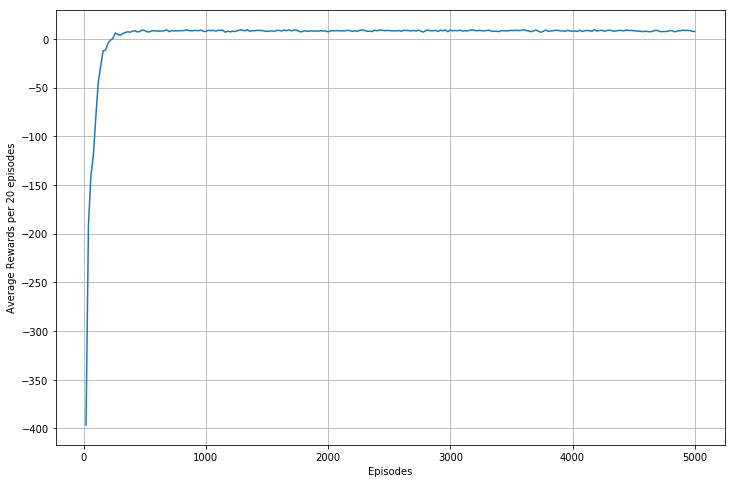

In [37]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(GP_avg_epi,GP_avg_rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Rewards per 20 episodes')
plt.grid()
#plt.legend()
plt.savefig('GreedyRewards.png')

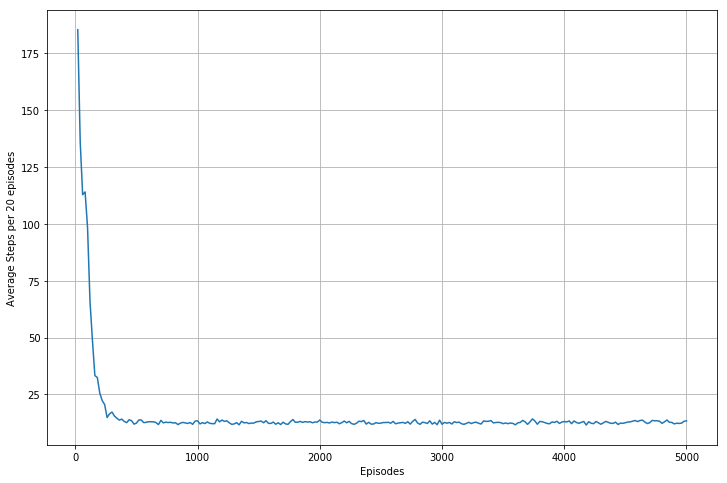

In [38]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(GP_avg_epi,GP_avg_steps)
plt.xlabel('Episodes')
plt.ylabel('Average Steps per 20 episodes')
plt.grid()
plt.savefig('GreedySteps.png')

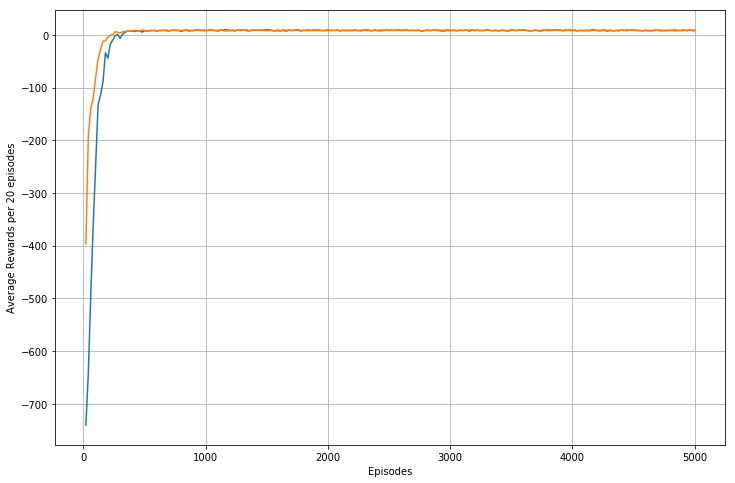

In [39]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(avg_epi,avg_rewards)
plt.plot(GP_avg_epi,GP_avg_rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Rewards per 20 episodes')
plt.grid()
plt.savefig('Greedy&EpsilonRewards.png')

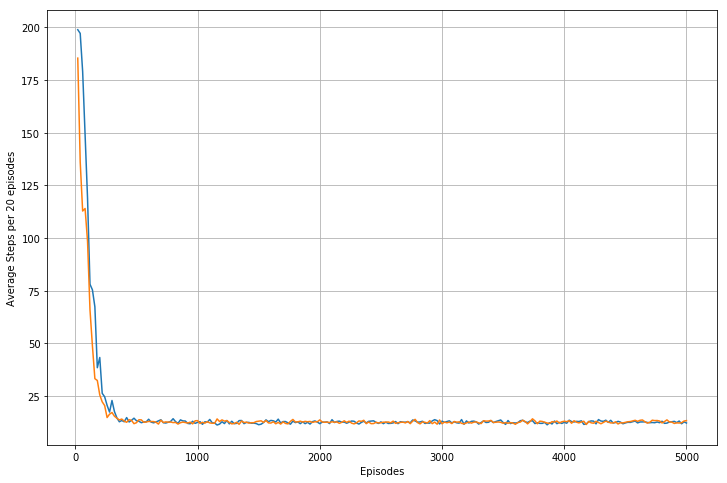

In [40]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(avg_epi,avg_steps)
plt.plot(GP_avg_epi,GP_avg_steps)
plt.xlabel('Episodes')
plt.ylabel('Average Steps per 20 episodes')
plt.grid()
plt.savefig('Greedy&EpsilonSteps.png')

In [41]:
#to further understand the performance, calculate the mean results from the last 1000 episodes
GP_reward=mean(GP_total_rewards[-1000:])
GP_step=mean(GP_total_steps[-1000:])
print('Greedy Policy mean reward = ',GP_reward)
print('Epsilon mean reward = ',mean_reward)
print('Greedy Policy mean step = ',GP_step)
print('Epsilon mean step = ',mean_step)

Greedy Policy mean reward =  8.234
Epsilon mean reward =  8.294
Greedy Policy mean step =  12.766
Epsilon mean step =  12.706


## Random Policy

In [42]:
def random_q_learning(alpha,gamma,epsilon,decay_rate,num_episodes):
    Q=initialize_Q();
    total_rewards=[]
    total_steps=[]
    total_episodes=[]
    
    for i in range(1,num_episodes+1):
        state=env.reset()
        done=False
        rewards_counter,steps_counter=0,0
        while not done:
            action = env.action_space.sample()  
            newstate,reward,done,info = env.step(action)
            
            #Q[state,action] = Q[state,action] + alpha*(reward + gamma*Q[newstate,np.argmax(Q[newstate])] - Q[state,action])
            old_value = Q[state, action]
            next_max = np.max(Q[newstate])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            Q[state, action] = new_value
            #rewards[i] += reward
            #steps[i]+=1
            rewards_counter+=reward
            steps_counter+=1
            state=newstate

        epsilon=epsilon*decay_rate;
        #print(epsilon)
        total_rewards.append(rewards_counter)
        total_steps.append(steps_counter)
        total_episodes.append(i)
    return total_rewards,total_steps

In [43]:
RP_total_rewards,RP_total_steps=random_q_learning(0.8,0.9,1.0,0.99,num_episodes)

In [44]:
#calculate the average rewards and steps per 20 episodes
RP_avg_rewards,RP_avg_epi=plotting(RP_total_rewards,num_episodes)
RP_avg_steps,RP_avg_epi=plotting(RP_total_steps,num_episodes)

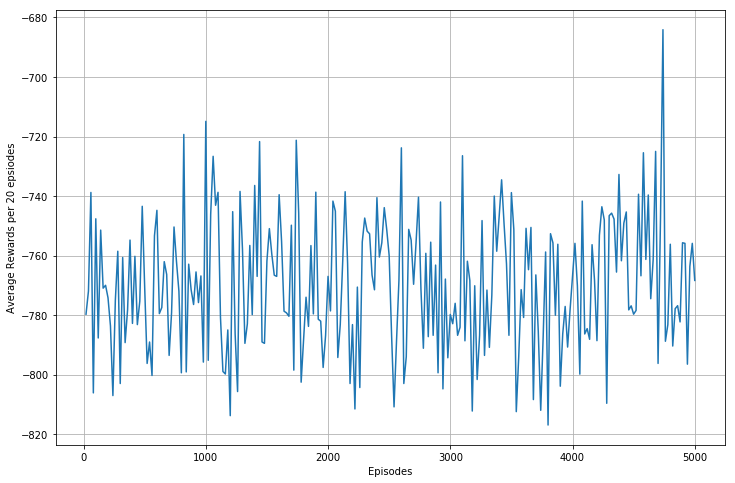

In [45]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(RP_avg_epi,RP_avg_rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Rewards per 20 epsiodes')
plt.grid()
plt.savefig('RandomRewards.png')

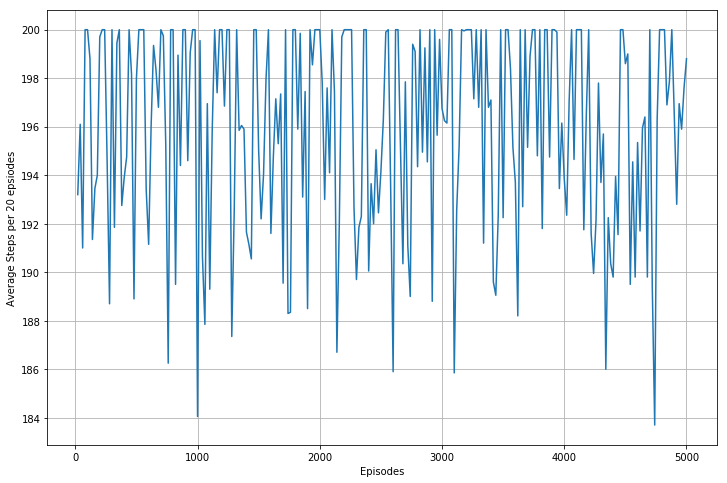

In [46]:
#plot the results
plt.figure(figsize=(12,8))
plt.plot(RP_avg_epi,RP_avg_steps)
plt.xlabel('Episodes')
plt.ylabel('Average Steps per 20 epsiodes')
plt.grid()
plt.savefig('RandomSteps.png')

In [47]:
#to further understand the performance, calculate the mean results from the last 1000 episodes
RP_reward=mean(RP_total_rewards[-1000:])
RP_step=mean(RP_total_steps[-1000:])
print('Greedy Policy mean rewards = ',RP_reward)
print('Epsilon mean rewards = ',mean_reward)
print('Greedy Policy mean steps = ',RP_step)
print('Epsilon mean steps = ',mean_step)

Greedy Policy mean rewards =  -763.498
Epsilon mean rewards =  8.294
Greedy Policy mean steps =  195.208
Epsilon mean steps =  12.706
